# CUSTOMER CHURN ANALYSIS

Submitted by:Sucharitha A M
             1829 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
df = pd.read_csv('Customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.shape

(7043, 21)

Dataset contains 7043 rows and 21 columns

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dataset contains 21 columns

# Summary statistics

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

Target/dependent variables is discrete and categorial in nature


In [9]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Datset contains some categorical values

# Data visualizations

<AxesSubplot:xlabel='customerID', ylabel='count'>

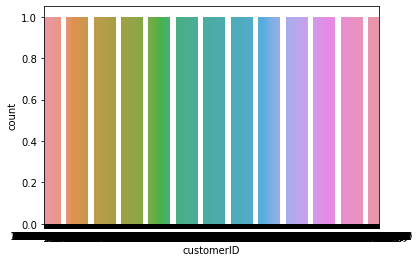

In [10]:
sns.countplot(df['customerID'])

Here Data is normally distributed in the all columns.

<AxesSubplot:xlabel='gender', ylabel='count'>

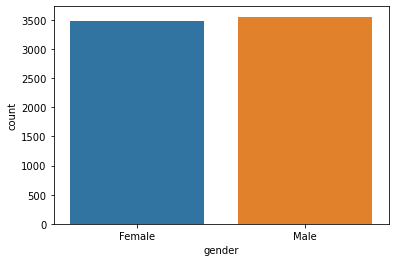

In [11]:
sns.countplot(df['gender'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

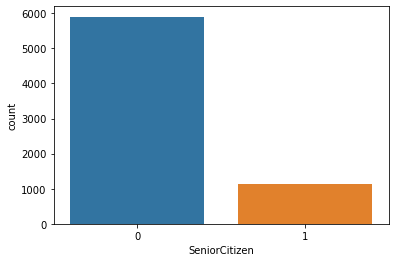

In [12]:
sns.countplot(df['SeniorCitizen'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Partner', ylabel='count'>

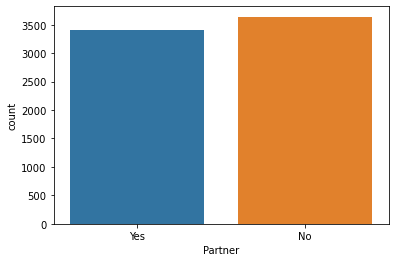

In [14]:
sns.countplot(df['Partner'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

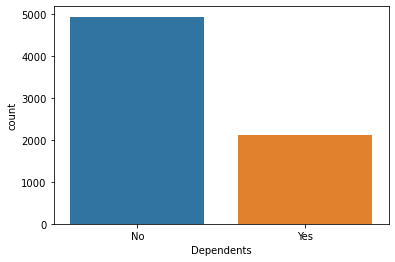

In [15]:
sns.countplot(df['Dependents'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='tenure', ylabel='count'>

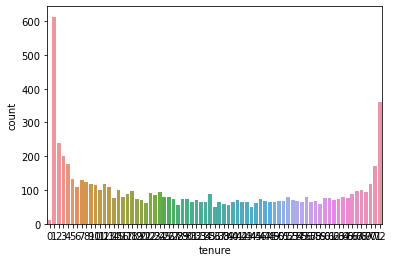

In [16]:
sns.countplot(df['tenure'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

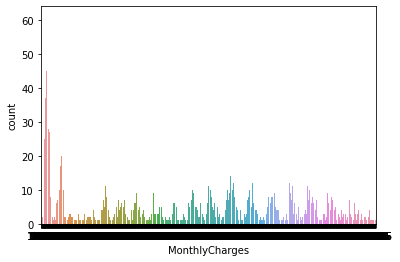

In [17]:
sns.countplot(df['MonthlyCharges'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Churn', ylabel='count'>

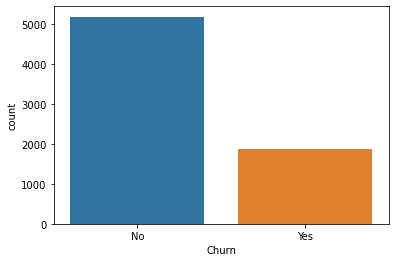

In [18]:
sns.countplot(df['Churn'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:>

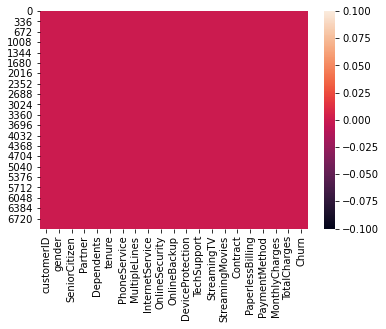

In [19]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [20]:
dfcor=df.corr()
dfcor

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

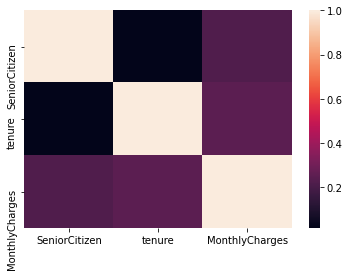

In [21]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

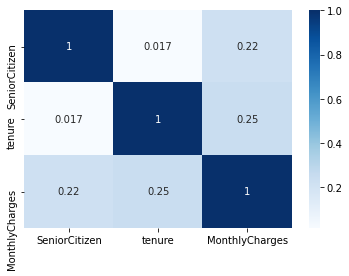

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are higly correlated

<AxesSubplot:>

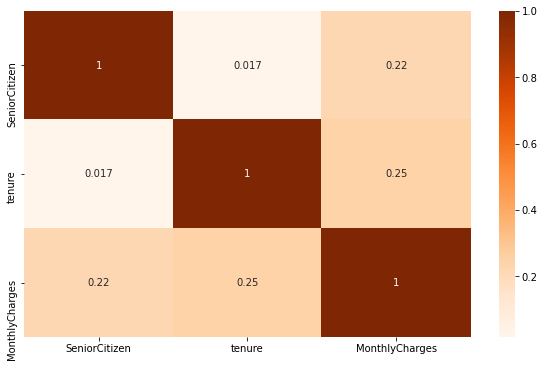

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

# Plotting outliers

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

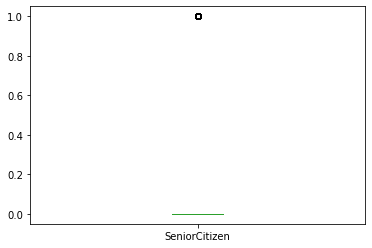

In [27]:
df['SeniorCitizen'].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

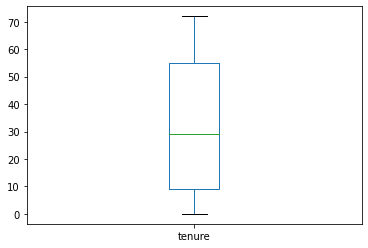

In [28]:
df['tenure'].plot.box()

Here all boxplot have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

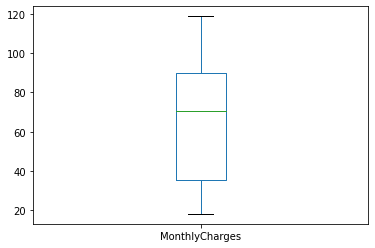

In [30]:
df['MonthlyCharges'].plot.box()

Here all boxplot have no outside the viscous so we cant find here outliers easily.

In [31]:
df.shape

(7043, 21)

Dataset contains 7043 rows and 21 columns

# To check distribution of skewness

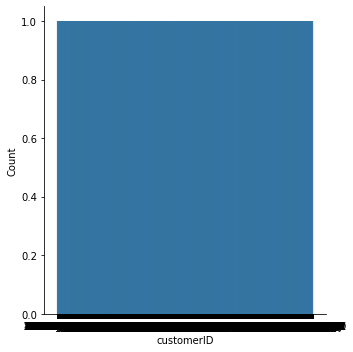

In [34]:
sns.displot(df['customerID'])

Data is normally distributed in this columns.

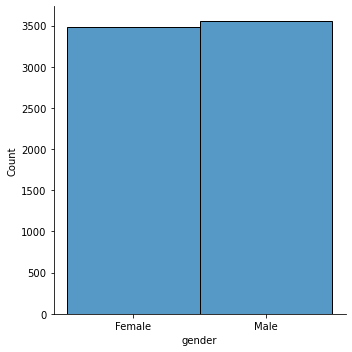

In [35]:
sns.displot(df['gender'])

Here Data is not normally distributed in the all columns.

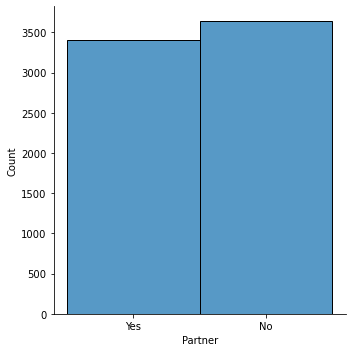

In [37]:
sns.displot(df['Partner'])

Here Data is not normally distributed in the all columns.

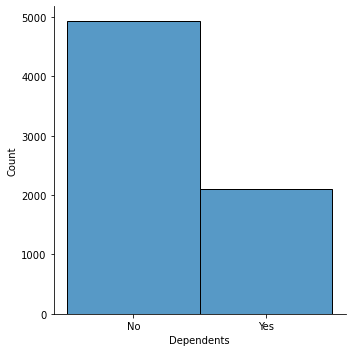

In [38]:
sns.displot(df['Dependents'])

Here Data is not normally distributed in the all columns.

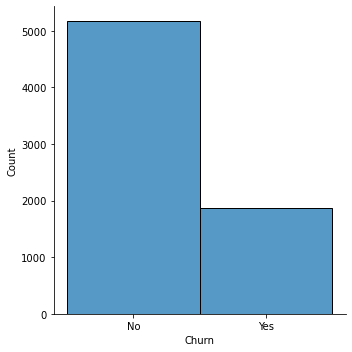

In [39]:
sns.displot(df['Churn'])

Here Data is not normally distributed in the all columns.

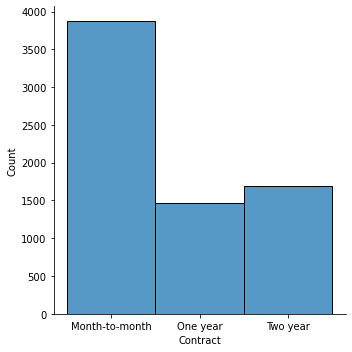

In [40]:
sns.displot(df['Contract'])

Here Data is not normally distributed in the all columns.

In [ ]:
sns.displot(df['TotalCharges'])

Here Data is not normally distributed in the all columns.

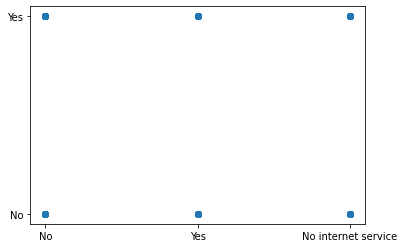

In [42]:
plt.scatter(df['TechSupport'],df['Churn'])

Here scattering the plot of TechSupport and Churn

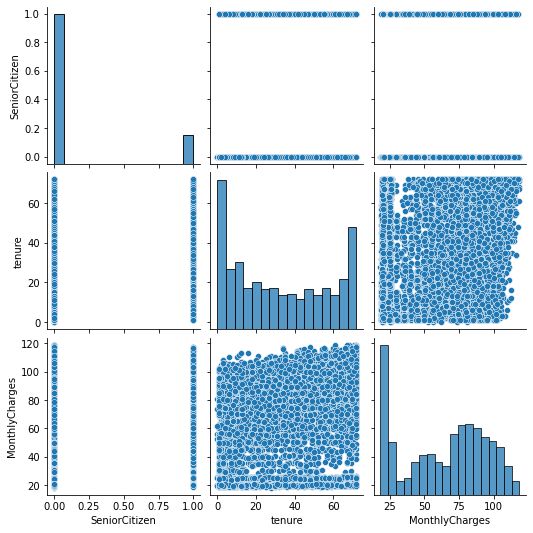

In [43]:
sns.pairplot(df)

Remove the missing values.

drop  the nahativitycorrelated columns.

remove the outliers.

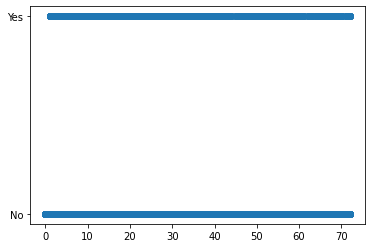

In [45]:
plt.scatter(df['tenure'],df['Churn'])
plt.show()

Here scattering the plot of tenure and churn

In [46]:
df.drop('gender',axis=1,inplace=True)

In [47]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encoding Method

In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['customerID']=LE.fit_transform(df['customerID'])


In [49]:
df.customerID.unique()

array([5375, 3962, 2564, ..., 3367, 5934, 2226])

In [50]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Partner']=LE.fit_transform(df['Partner'])


In [52]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Dependents']=LE.fit_transform(df['Dependents'])


In [54]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['PhoneService']=LE.fit_transform(df['PhoneService'])


In [56]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['MultipleLines']=LE.fit_transform(df['MultipleLines'])


In [58]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,0,0,0,45,0,1,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['InternetService']=LE.fit_transform(df['InternetService'])


In [60]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,0,1,0,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,0,0,0,34,1,0,0,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,0,0,0,2,1,0,0,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,0,0,0,45,0,1,0,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,0,0,2,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['OnlineBackup']=LE.fit_transform(df['OnlineBackup'])
df['OnlineSecurity']=LE.fit_transform(df['OnlineSecurity'])
df['DeviceProtection']=LE.fit_transform(df['DeviceProtection'])
df['TechSupport']=LE.fit_transform(df['TechSupport'])
df['StreamingTV']=LE.fit_transform(df['StreamingTV'])
df['StreamingMovies']=LE.fit_transform(df['StreamingMovies'])
df['Contract']=LE.fit_transform(df['Contract'])
df['PaperlessBilling']=LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=LE.fit_transform(df['PaymentMethod'])
df['MonthlyCharges']=LE.fit_transform(df['MonthlyCharges'])
df['TotalCharges']=LE.fit_transform(df['TotalCharges'])
df['Churn']=LE.fit_transform(df['Churn'])

In [75]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,5535,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


# Removing The Outlier Method

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.91189045, 0.43991649, 1.03453023, ..., 1.13176632, 0.39860759,
        0.60102348],
       [0.21690598, 0.43991649, 0.96662231, ..., 0.38773977, 0.94876238,
        0.60102348],
       [0.47070074, 0.43991649, 0.96662231, ..., 0.51731743, 1.64188328,
        1.66382851],
       ...,
       [0.07574495, 0.43991649, 1.03453023, ..., 1.14221613, 0.13968008,
        0.60102348],
       [1.18683477, 2.27315869, 1.03453023, ..., 0.23297901, 0.31653445,
        1.66382851],
       [0.63694614, 0.43991649, 0.96662231, ..., 1.4723266 , 1.13801338,
        0.60102348]])

Here removing the outliers of df

In [77]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [78]:
df_new=df[(z<3).all(axis=1)]
df_new

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
5,6551,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,6104,1
6,1002,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1075,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,52,770,0
7038,4853,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7041,5934,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


In [79]:
df.shape

(7043, 20)

Dataset contains the 7043 rows and 20 columns

In [80]:
df_new.shape

(6361, 20)

New Dataset contains 6361 rows and 20 columns

# StandardScaler Method

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [82]:
scaledX

array([[ 0.91189045, -0.43991649,  1.03453023, ..., -1.13176632,
        -0.39860759, -0.60102348],
       [ 0.21690598, -0.43991649, -0.96662231, ..., -0.38773977,
        -0.94876238, -0.60102348],
       [-0.47070074, -0.43991649, -0.96662231, ..., -0.51731743,
        -1.64188328,  1.66382851],
       ...,
       [-0.07574495, -0.43991649,  1.03453023, ..., -1.14221613,
        -0.13968008, -0.60102348],
       [ 1.18683477,  2.27315869,  1.03453023, ...,  0.23297901,
        -0.31653445,  1.66382851],
       [-0.63694614, -0.43991649, -0.96662231, ...,  1.4723266 ,
         1.13801338, -0.60102348]])

Here the StandardScaler value of ScaledX

In [83]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [84]:
Y.explained_variance_ratio_

array([0.18643097, 0.12206922, 0.07486924, 0.06135357, 0.05411513,
       0.05048635, 0.04943388, 0.04363107, 0.04182062, 0.03944868,
       0.03876605, 0.03583391, 0.03523902, 0.03422739, 0.03266412,
       0.02814895, 0.02588264, 0.02312325, 0.01268922, 0.0097667 ])

In [85]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 18.64309656,  30.85001822,  38.33694266,  44.47229977,
        49.88381248,  54.93244756,  59.87583518,  64.23894238,
        68.42100424,  72.36587271,  76.24247759,  79.82586847,
        83.34977084,  86.77251006,  90.03892254,  92.85381761,
        95.44208196,  97.75440726,  99.0233296 , 100.        ])

In [86]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 18


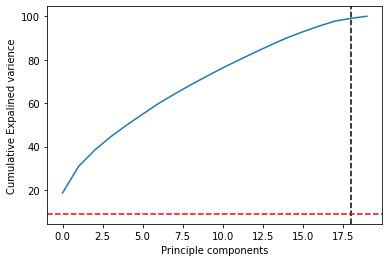

In [87]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here plot the values x axis is principle components and y axis is cumulative explained varience

# Missing Value Handling Method

In [88]:
df.isnull().sum()

customerID          0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset contains the all null values will be zeros

In [89]:
df["Partner"]=df["Partner"].fillna(df["Partner"].mean())
df["tenure"]=df["tenure"].fillna(df["tenure"].median())


# Model Building

In [91]:
x_train=df.drop('Churn',axis=1)
y_train=df.Churn

In [92]:
x_train.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,5535,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925


In [93]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [94]:
x_train.shape

(7043, 19)

x_train contains 7043 rows and 19 columns

In [95]:
y_train.shape

(7043,)

y_train contains 7043 rows and zero columns

# Classification Methods

In [96]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [97]:
x= df.drop(['Churn'],axis=1)
y=df["Churn"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

73.0752688172043 at random_state 0
72.34408602150538 at random_state 1
72.43010752688171 at random_state 2
73.63440860215053 at random_state 3
71.56989247311827 at random_state 4
72.7741935483871 at random_state 5
73.11827956989248 at random_state 6
73.50537634408603 at random_state 7
72.0 at random_state 8
70.9247311827957 at random_state 9
72.47311827956989 at random_state 10
73.59139784946237 at random_state 11
73.46236559139786 at random_state 12
73.0752688172043 at random_state 13
72.43010752688171 at random_state 14
73.63440860215053 at random_state 15
72.0 at random_state 16
72.94623655913979 at random_state 17
72.68817204301075 at random_state 18
73.20430107526882 at random_state 19
73.72043010752688 at random_state 20
72.73118279569893 at random_state 21
70.58064516129032 at random_state 22
73.67741935483872 at random_state 23
73.3763440860215 at random_state 24
71.61290322580646 at random_state 25
72.34408602150538 at random_state 26
72.25806451612902 at random_state 27
72.94

In [99]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)        


Best accuracy is 0.7562707051585423  on Random_state 1


In [100]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1555
           1       0.47      0.51      0.49       558

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113

Test Accuracy:72.03%


The test Accuracy of DecisionTressClassifier is 72.03%

In [101]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.53      0.58       558

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Test Accuracy:79.6%


The test Accuracy of LogisticRegression is 79.6%

In [102]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0


In [103]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1555
           1       0.53      0.32      0.40       558

    accuracy                           0.75      2113
   macro avg       0.66      0.61      0.62      2113
weighted avg       0.72      0.75      0.72      2113

Test Accuracy:74.54%


The test Accuarcy of KNeighbors classifier is 74.54%

In [104]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))

 SVM Classifier: 

               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1555
           1       0.00      0.00      0.00       558

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.74      0.62      2113

Test Accuracy:73.59%


The test Accuracy of SVC is 73.59%

In [105]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1555
           1       0.53      0.74      0.62       558

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113

Test Accuracy:75.53%


The test Accuracy of nb is 75.53%

In [106]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.52      0.57       558

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Test Accuracy:79.56%


The Accuracy of RandomForestClassifier is 79.56%

# Cross value correction

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7252582827924383


In [109]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7976717247886961


In [110]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7408767299503193


In [111]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.7346301575908123


In [112]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.756353736531389


In [113]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7863136331376218


# Hyperparameter tunning

In [114]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [118]:
rf = RandomForestClassifier()

In [119]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [120]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

# AUC ROC Curve

In [123]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [124]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.05, 0.76, ..., 0.14, 0.23, 0.74])

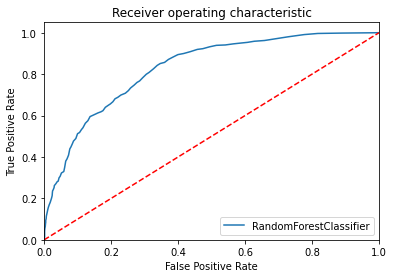

In [126]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

Here plot contains false positive rate on x axis and true positive rate on y axis for randomforestclassifier

# Evalute The Final Model

In [127]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.21769995267393


# Saving The Model

In [128]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Saving the model[FinalModle.pkl]

# Prediction Method

In [129]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]


The train and test data is balanced most classification methods hit the 80% accuracy with the datset.